In [2]:
import tensorflow as tf
from keras import datasets, layers, models

In [3]:
def create_model():
    '''
    Define a CNN where input to the model must be a 96 by 96 pixel, greyscale, image

    Returns:
    -------
    model: A fully-connected output layer with 30 facial keypoints
    '''

    model = models.Sequential()
    model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(96, 96, 1)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.1))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(30))
    return model


In [4]:
def compile_model(model, optimizer, loss, metrics):
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [5]:
def train_model(model, X_train, y_train):
    return model.fit(X_train, y_train, epochs=100, batch_size=200, verbose=1, validation_split=0.2)

In [6]:
def save_model(model, fileName):
    model.save(fileName + '.h5')

In [7]:
def load_model(fileName):
    return models.load_model(fileName + '.h5')

In [ ]:
# pd.read_csv('/content/gdrive/MyDrive/project4_data/cnn_model.py.csv')

In [8]:
import pandas as pd
import numpy as np
import cv2
from pandas.core.frame import DataFrame
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
training = pd.read_csv('/content/gdrive/My Drive/training.csv')

In [9]:
def prepare_data(df):
    '''
    Prepare data image and target variables for training

    Parameters:
    ------------------
    df: Training DataFrame

    Returns:
    -------------
    X: Image (Feature) column
    y: Target column (facial points)

    '''
    
    # Create numpy array for pixel values in image column that are seperated by space
    df['Image'] = df['Image'].apply(lambda x: np.fromstring(x, sep=' '))

    # Drop all rows that have missing values in them
    df = df.dropna()

    # Normalize the pixel values, scale values between 0 and 1
    X = np.vstack(df['Image'].values) / 255.
    X = X.astype(np.float32)

    # return each image as a 96 x 96 x 1
    X = X.reshape(-1, 96, 96, 1)

    # 30 columns
    y = df[df.columns[:-1]].values

    # Normalize the target value, scale values between 0 and 1
    y = (y - 48) / 48

    # schuffle train data
    X, y = shuffle(X,y, random_state=42)
    y = y.astype(np.float32)

    return X,y

In [10]:
def plot_data(img, face_points):

    '''
    Plot image and facial keypoints

    Parameters:
    ----------------
    img: Image column value
    face_point: Target column value
    '''
    
    fig = plt.figure(figsize=(30,30))
    ax = fig.add_subplot(121)
    
    # Plot the image
    ax.imshow(np.squeeze(img), cmap='gray')
    face_points = face_points * 48 + 48

    # Plot the keypoints
    ax.scatter(face_points[0::2], face_points[1::2], marker='o', c='c', s=10)
    plt.show()

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
# Load training data
df = pd.read_csv('/content/gdrive/My Drive/training.csv')

In [15]:
X_train, y_train = prepare_data(df)

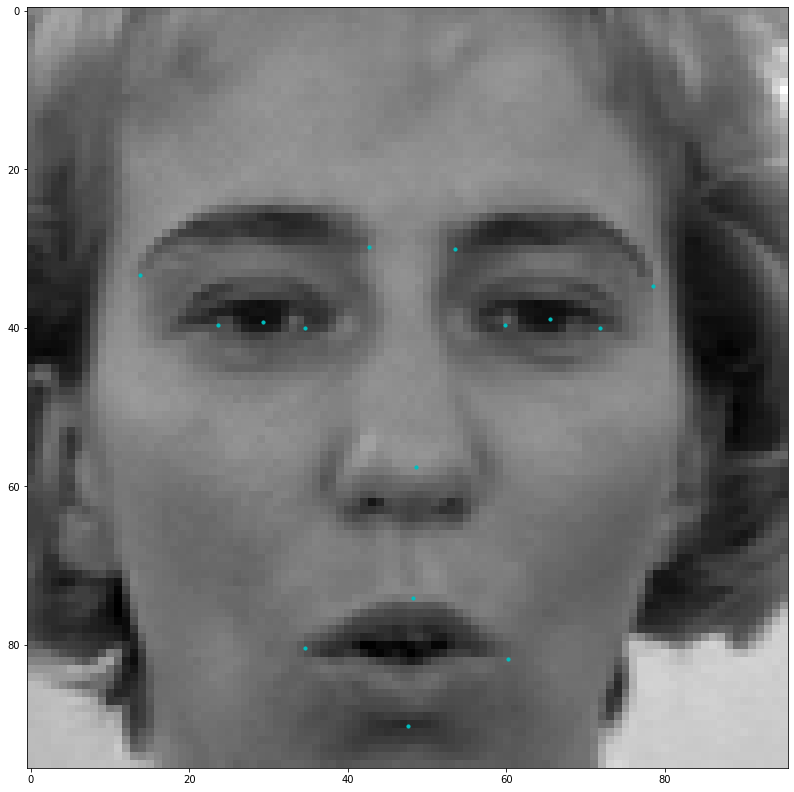

In [16]:
# Plot image and facial points for train dataset
plot_data(X_train[200], y_train[200])

In [17]:
# Create the model architecture
my_model = create_model()

In [18]:
# Compile the model with an appropriate optimizer and loss and metrics
compile_model(my_model, optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [19]:
# Train the model
hist = train_model(my_model, X_train, y_train)

Epoch 1/100
9/9 [==============================] - 32s 3s/step - loss: 0.1043 - accuracy: 0.1910 - val_loss: 0.0713 - val_accuracy: 0.2523
Epoch 2/100
9/9 [==============================] - 31s 3s/step - loss: 0.0495 - accuracy: 0.1957 - val_loss: 0.0425 - val_accuracy: 0.2523
Epoch 3/100
9/9 [==============================] - 31s 3s/step - loss: 0.0188 - accuracy: 0.5602 - val_loss: 0.0220 - val_accuracy: 0.6963
Epoch 4/100
9/9 [==============================] - 31s 3s/step - loss: 0.0078 - accuracy: 0.5607 - val_loss: 0.0123 - val_accuracy: 0.2523
Epoch 5/100
9/9 [==============================] - 31s 3s/step - loss: 0.0065 - accuracy: 0.4375 - val_loss: 0.0123 - val_accuracy: 0.6963
Epoch 6/100
9/9 [==============================] - 31s 3s/step - loss: 0.0058 - accuracy: 0.6922 - val_loss: 0.0130 - val_accuracy: 0.6963
Epoch 7/100
9/9 [==============================] - 31s 3s/step - loss: 0.0053 - accuracy: 0.7068 - val_loss: 0.0128 - val_accuracy: 0.6963
Epoch 8/100
9/9 [==========

In [20]:
# Save the model
save_model(my_model, 'models/mm')